# Results for the toygraph experiment

In [5]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# reading in the ceo results
with open("ToyGraph/ceo_results.pickle", "rb") as file:
    ceo_results_dict = pickle.load(file)

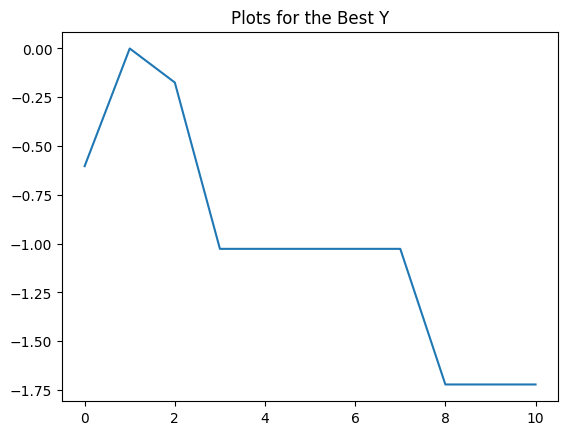

In [7]:
plt.plot(ceo_results_dict["Best_Y"])
plt.title("Plots for the Best Y")
plt.show()

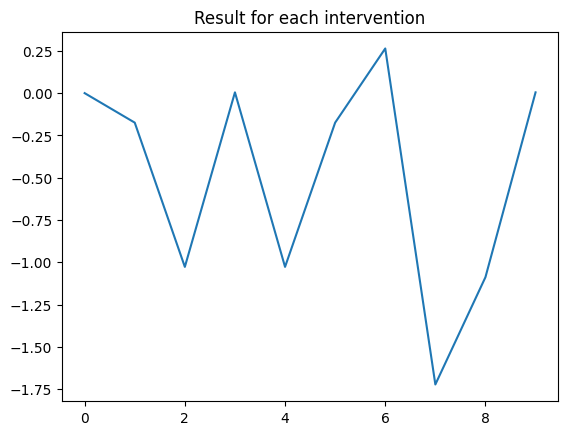

In [8]:
plt.plot(ceo_results_dict["Per_trial_Y"])
plt.title("Result for each intervention")
plt.show()

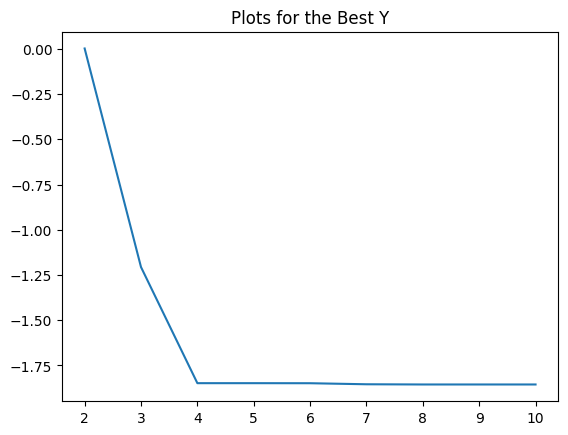

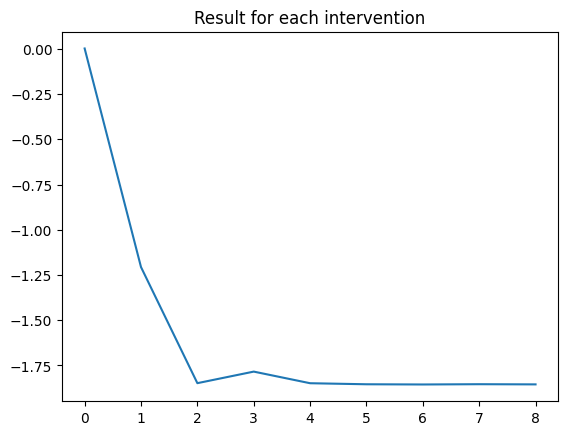

In [9]:
# reading in the ceo results
with open("ToyGraph/run[1]_cbo_results_graph_0.pickle", "rb") as file:
    ceo_results_dict = pickle.load(file)

# plotting the best ones
plt.plot(ceo_results_dict["Best_Y"])
plt.title("Plots for the Best Y")
plt.show()

# plotting each trial
plt.plot(ceo_results_dict["Per_trial_Y"])
plt.title("Result for each intervention")
plt.show()

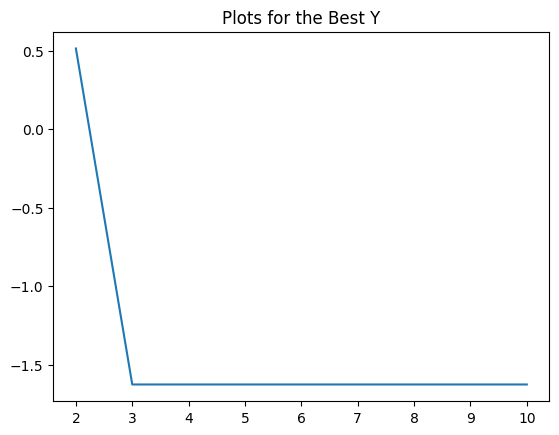

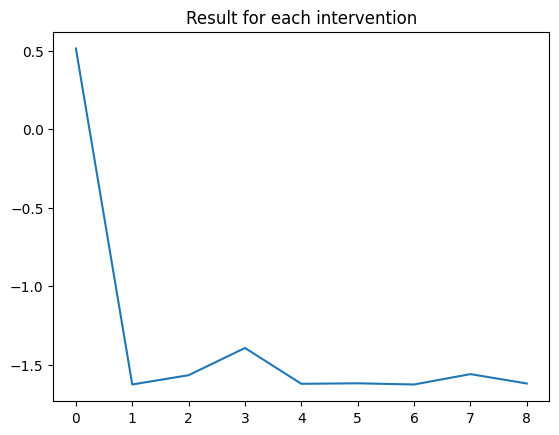

In [10]:
# reading in the ceo results
with open("ToyGraph/run[1]_cbo_results_graph_1.pickle", "rb") as file:
    ceo_results_dict = pickle.load(file)

# plotting the best ones
plt.plot(ceo_results_dict["Best_Y"])
plt.title("Plots for the Best Y")
plt.show()

# plotting each trial
plt.plot(ceo_results_dict["Per_trial_Y"])
plt.title("Result for each intervention")
plt.show()

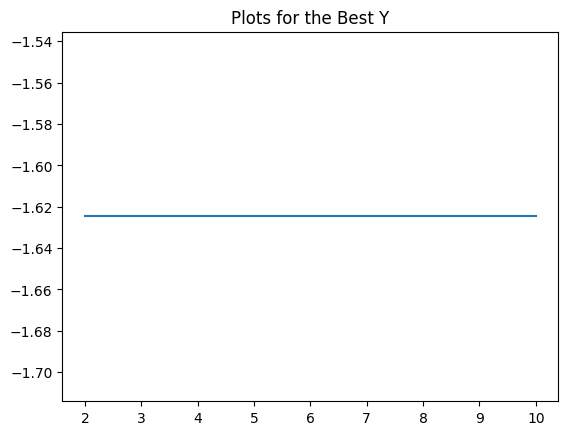

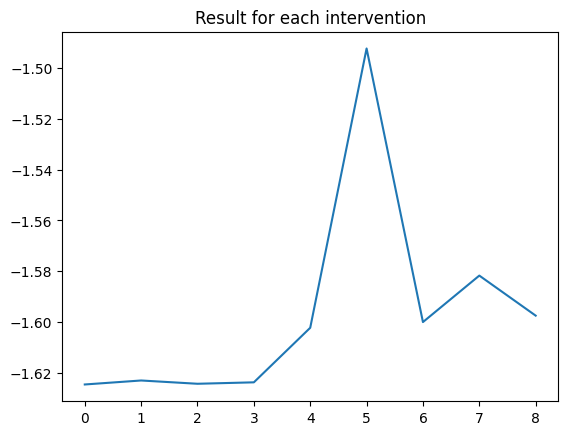

In [11]:
# reading in the ceo results
with open("ToyGraph/run[1]_cbo_results_graph_2.pickle", "rb") as file:
    ceo_results_dict = pickle.load(file)

# plotting the best ones
plt.plot(ceo_results_dict["Best_Y"])
plt.title("Plots for the Best Y")
plt.show()

# plotting each trial
plt.plot(ceo_results_dict["Per_trial_Y"])
plt.title("Result for each intervention")
plt.show()

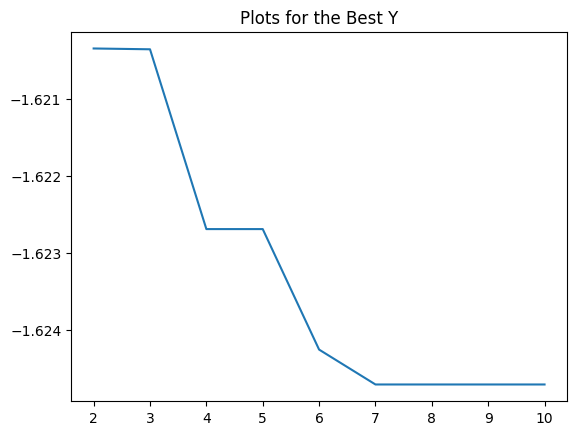

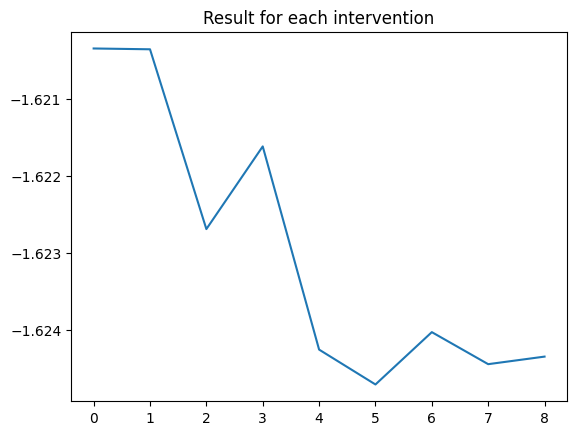

In [12]:
# reading in the ceo results
with open("ToyGraph/run[1]_cbo_results_graph_3.pickle", "rb") as file:
    ceo_results_dict = pickle.load(file)

# plotting the best ones
plt.plot(ceo_results_dict["Best_Y"])
plt.title("Plots for the Best Y")
plt.show()

# plotting each trial
plt.plot(ceo_results_dict["Per_trial_Y"])
plt.title("Result for each intervention")
plt.show()

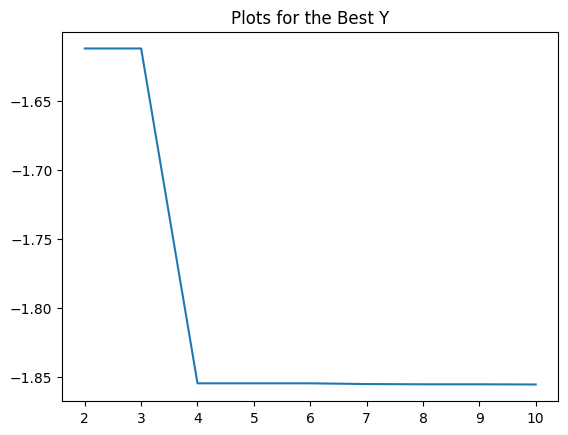

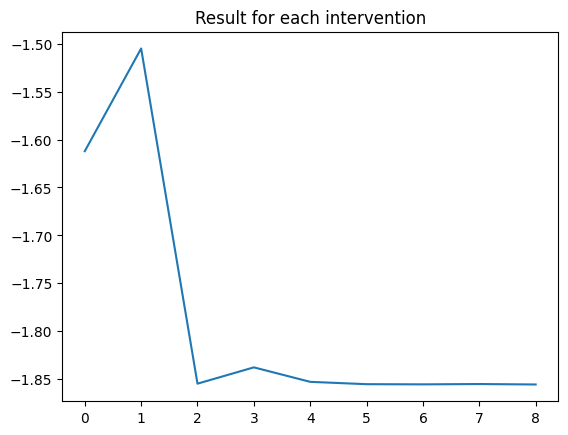

In [13]:
# reading in the ceo results
with open("ToyGraph/run[1]_cbo_results_graph_4.pickle", "rb") as file:
    ceo_results_dict = pickle.load(file)

# plotting the best ones
plt.plot(ceo_results_dict["Best_Y"])
plt.title("Plots for the Best Y")
plt.show()

# plotting each trial
plt.plot(ceo_results_dict["Per_trial_Y"])
plt.title("Result for each intervention")
plt.show()

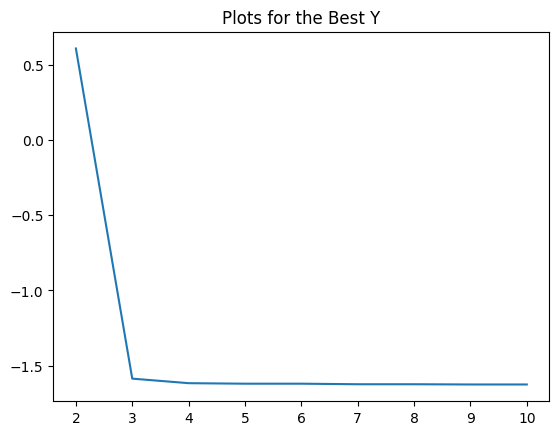

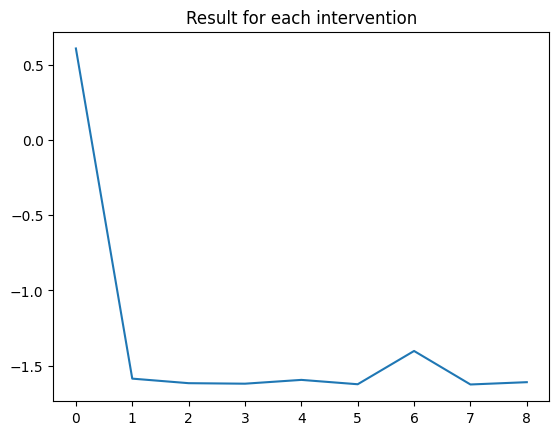

In [14]:
# reading in the ceo results
with open("ToyGraph/run[1]_cbo_results_graph_5.pickle", "rb") as file:
    ceo_results_dict = pickle.load(file)

# plotting the best ones
plt.plot(ceo_results_dict["Best_Y"])
plt.title("Plots for the Best Y")
plt.show()

# plotting each trial
plt.plot(ceo_results_dict["Per_trial_Y"])
plt.title("Result for each intervention")
plt.show()

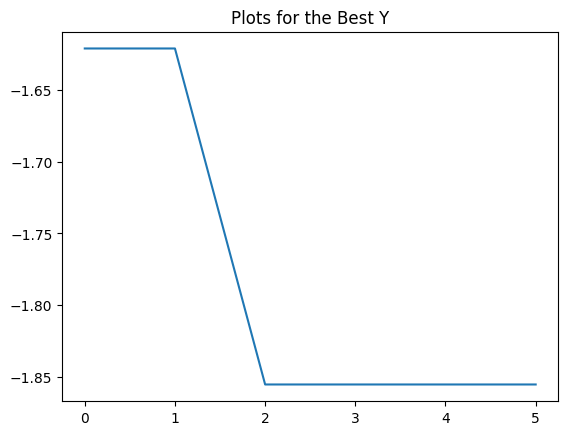

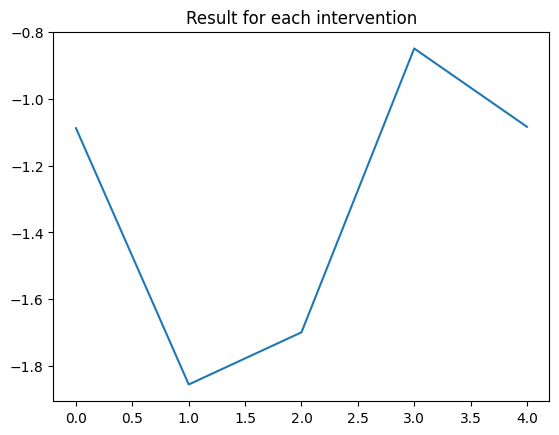

In [16]:
# reading in the ceo results
with open("ToyGraph/run1_bo_results.pickle", "rb") as file:
    ceo_results_dict = pickle.load(file)

# plotting the best ones
plt.plot(ceo_results_dict["Best_Y"])
plt.title("Plots for the Best Y")
plt.show()

# plotting each trial
plt.plot(ceo_results_dict["Per_trial_Y"])
plt.title("Result for each intervention")
plt.show()